## S14a: Lab 2 - Pricing, houses


### 1. Let's start by reading in our data

In [2]:
# Imports

import numpy as np
import pandas as pd

In [3]:
# Read in data with pandas

data = pd.read_csv('./data/Boston_March2018.csv')

# Preview

data.head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
0,72049670,SLD,239900.0,247000.0,8/6/2016,3/1/2018,NaN,295,295,16 Pine St,...,NaN,NaN,NaN,NaN,NaN,MF,Pine St,16,16,http://media.mlspin.com/photo.aspx?mls=72049670
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522
2,72080286,SLD,2999999.0,2950000.0,10/12/2016,3/1/2018,NaN,504,493,80 Monadnock Road,...,NaN,WPS,WMS,WHS,Basement:Yes;Fireplaces:3;Roof:Asphalt/Fibergl...,SF,Monadnock Road,80,80,http://media.mlspin.com/photo.aspx?mls=72080286
3,72118879,SLD,2600000.0,2600000.0,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101


In [4]:
# View from another angle

data.iloc[100:].head()

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
100,72253657,SLD,539000.0,530000.0,11/9/2017,3/1/2018,NaN,97,33,304 Neponset,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:--;Floor:Hardwo...,CC,Neponset,304,304,http://media.mlspin.com/photo.aspx?mls=72253657
101,72255734,SLD,829000.0,787500.0,11/15/2017,3/1/2018,NaN,20,5,73 Thaxter St,...,NaN,Foster,Hingham Middle,Hingham High,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Thaxter St,73,73,http://media.mlspin.com/photo.aspx?mls=72255734
102,72255735,SLD,1799000.0,1734300.0,11/15/2017,3/1/2018,NaN,71,71,15 Dix Street Unit 2,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:1;Roof:Asphalt/Fibergla...,CC,Dix Street Unit 2,15,15,http://media.mlspin.com/photo.aspx?mls=72255735
103,72255807,SLD,749000.0,780000.0,11/15/2017,3/1/2018,NaN,21,6,30 Spring Lane,...,NaN,Downey,Thurston,WHS,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,SF,Spring Lane,30,30,http://media.mlspin.com/photo.aspx?mls=72255807
104,72256216,SLD,619900.0,615000.0,11/16/2017,3/1/2018,NaN,32,20,73 CIRCLE DRIVE,...,NaN,Northeast,Kennedy,Waltham,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,CIRCLE DRIVE,73,73,http://media.mlspin.com/photo.aspx?mls=72256216


### 2. Explore the data

In [5]:
# Narrow the view

prices = ['LISTPRICE', 'SOLDPRICE']
data[prices].head()

,LISTPRICE,SOLDPRICE
0,239900.0,247000.0
1,338000.0,338000.0
2,2999999.0,2950000.0
3,2600000.0,2600000.0
4,525000.0,525000.0


In [6]:
# !YOUR TURN!
# Look at sum
print(data[prices].sum())

# Look at mean
print(data[prices].mean())

LISTPRICE    2.486085e+09
SOLDPRICE    2.464492e+09
dtype: float64
LISTPRICE    480774.491561
SOLDPRICE    476598.774637
dtype: float64


In [7]:
# Let's take a look at the property types
# Lists all unique values of a field
proptypes = data.PROPTYPE.unique()
proptypes

array(['MF', 'CC', 'SF'], dtype=object)

In [8]:
# Tinker around with some filtering options

data[(data.SOLDPRICE < 1000000) & (data.PROPTYPE == "SF")]

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101
5,72133120,SLD,468000.0,479000.0,3/20/2017,3/1/2018,NaN,273,273,27 Jennings Way,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Jennings Way,27,27,http://media.mlspin.com/photo.aspx?mls=72133120
6,72148511,SLD,209900.0,176505.0,4/19/2017,3/1/2018,NaN,311,287,26 HATHAWAY STREET,...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:--;Floor:--;Appl...,SF,HATHAWAY STREET,26,26,http://media.mlspin.com/photo.aspx?mls=72148511
7,72153413,SLD,549900.0,530000.0,4/26/2017,3/1/2018,NaN,261,261,9 Sheffield Place,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Sheffield Place,9,9,http://media.mlspin.com/photo.aspx?mls=72153413
9,72166889,SLD,130000.0,130000.0,5/16/2017,3/1/2018,NaN,185,185,88 Marcelle St,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Marcelle St,88,88,http://media.mlspin.com/photo.aspx?mls=72166889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,72297021,SLD,549860.0,549860.0,3/21/2018,3/28/2018,NaN,1,1,55 Goldfinch Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:--;Floor:--;App...,SF,Goldfinch Drive,55,55,http://media.mlspin.com/photo.aspx?mls=72297021
5167,72298565,SLD,97500.0,135000.0,3/26/2018,3/28/2018,NaN,0,0,15 Wood Path,...,NaN,J.R. Briggs,Overlook,Oakmont,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Wood Path,15,15,http://media.mlspin.com/photo.aspx?mls=72298565
5168,72298853,SLD,675000.0,616500.0,3/27/2018,3/30/2018,NaN,2,2,373 Bay Lane,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Bay Lane,373,373,http://media.mlspin.com/photo.aspx?mls=72298853
5169,72299954,SLD,369900.0,369000.0,3/22/2018,3/29/2018,NaN,7,4,17 Rounsevell Dr,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Rounsevell Dr,17,17,http://media.mlspin.com/photo.aspx?mls=72299954


In [9]:
# Look at everything

data[(data.SOLDPRICE < 1000000) & (data.PROPTYPE == "SF")].describe()

,MLSNUM,LISTPRICE,SOLDPRICE,EXPIREDDATE,DOM,DTO,ZIP,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE,COOLING
count,3.073000e+03,3.073000e+03,3073.000000,0.0,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3073.000000,3.073000e+03,3073.000000,0.0
mean,7.225360e+07,3.942997e+05,390127.363449,NaN,75.875366,52.906931,2043.507322,3.280182,1.917833,1854.116499,61.573056,3.953942e+04,1.003580,NaN
std,4.341004e+04,1.950847e+05,193491.107775,NaN,94.900207,67.099034,1148.558638,0.807630,0.754220,799.750766,53.664867,3.524745e+05,1.010518,NaN
min,7.115216e+07,1.990000e+04,23000.000000,NaN,0.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,7.224663e+07,2.500000e+05,250000.000000,NaN,19.000000,6.000000,1602.000000,3.000000,1.500000,1287.000000,31.000000,7.579000e+03,0.000000,NaN
50%,7.226606e+07,3.500000e+05,350000.000000,NaN,43.000000,25.000000,1960.000000,3.000000,2.000000,1677.000000,58.000000,1.393900e+04,1.000000,NaN
75%,7.227446e+07,4.999000e+05,494900.000000,NaN,105.000000,80.000000,2364.000000,4.000000,2.500000,2244.000000,82.000000,3.006200e+04,2.000000,NaN
max,7.230167e+07,1.150000e+06,999900.000000,NaN,1562.000000,826.000000,34452.000000,8.000000,5.500000,8546.000000,1863.000000,1.868724e+07,9.000000,NaN


In [10]:
# Group by prop type

data_by_proptype = data.groupby('PROPTYPE')
data_by_proptype.describe()

MLSNUM                                                      \
           count          mean           std         min         25%   
PROPTYPE                                                               
CC        1444.0  7.225364e+07  45088.556068  71836809.0  72251477.0   
MF         484.0  7.225119e+07  47702.020613  71888962.0  72246695.0   
SF        3243.0  7.225306e+07  44125.890963  71152163.0  72246143.5   

                                              LISTPRICE                 ...  \
                 50%          75%         max     count           mean  ...   
PROPTYPE                                                                ...   
CC        72270354.0  72277153.75  72296323.0    1444.0  512072.209661  ...   
MF        72266094.5  72274428.25  72294677.0     484.0  498397.169421  ...   
SF        72265821.0  72274353.00  72301673.0    3243.0  464208.570802  ...   

         GARAGE      COOLING                               
            75%  max   count mean std min 25% 50% 75% max  
PROPTYPE                                                   
CC          1.0  2.0     0.0  NaN NaN NaN NaN NaN NaN NaN  
MF          1.0  7.0     0.0  NaN NaN NaN NaN NaN NaN NaN  
SF          2.0  9.0     0.0  NaN NaN NaN NaN NaN NaN NaN  

[3 rows x 112 columns]

In [10]:
# Zoom in

data_by_proptype[['LISTPRICE', 'SOLDPRICE']].mean()

,LISTPRICE,SOLDPRICE
PROPTYPE,,
CC,512072.209661,515437.729363
MF,498397.169421,493278.811983
SF,464208.570802,456815.676056


### 3. Introducing [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) with Scikit Learn

In [12]:
# Import sklearn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
# Define model

regr = linear_model.LinearRegression()


In [14]:
# Define label and features (adjustable)

label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']


In [15]:
# Filter out empties and properties over 1M
def copy_and_filter(data):
    filter_data = data.copy()

    # Additional
    filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]


    # Apply to all
    for f in features + label:
        # Out empties - (v. imputation)
        filter_data = filter_data[filter_data[f].notna()]

        # Interaction terms

        # Standardize
#         filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()

#         # v. Normalize
#         filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())

    filter_data = filter_data.reset_index()

    print(filter_data[label].head())
    print(filter_data[features].head())
    return filter_data
filter_data = copy_and_filter(data)

   SOLDPRICE
0   247000.0
1   525000.0
2   479000.0
3   176505.0
4   530000.0
   BEDS  BATHS  SQFT  AGE   LOTSIZE  GARAGE
0    12    4.0  4772  118    8350.0       0
1     3    3.0  2774   28  106286.0       2
2     3    2.5  2000    1   30000.0       2
3     2    1.0     0    0       0.0       0
4     3    2.5  2639   15   18730.0       2


In [16]:
# Extract features and label

label_data = filter_data[label]
features_data = filter_data[features]


In [17]:
# !YOUR TURN!

# Take a look at the shapes for 'labels' and 'features'
label_data.shape, features_data.shape

((3838, 1), (3838, 6))

In [30]:
features_data.head()

,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE
0,12,4.0,4772,118,8350.0,0
1,3,3.0,2774,28,106286.0,2
2,3,2.5,2000,1,30000.0,2
3,2,1.0,0,0,0.0,0
4,3,2.5,2639,15,18730.0,2


In [18]:
# Set up testing and training (adjustable)
split = int(len(filter_data) * 0.20)

features_train = features_data[:split]
features_test = features_data[split:]
label_train = label_data[:split]
label_test = label_data[split:]

# Check shapes

print ("Train shape")
print (features_train.shape, label_train.shape)
print ("\nTest shape")
print (features_test.shape, label_test.shape)

Train shape
(767, 6) (767, 1)

Test shape
(3071, 6) (3071, 1)


In [19]:
# Fit training sets

regr.fit(features_train, label_train)


LinearRegression()

In [20]:
# Make predictions using testing set

label_pred = regr.predict(features_test)

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(label_test, label_pred))


Variance score: 0.30


### 4. Plot, aka "Visualize"

In [22]:
# Import
import matplotlib.pyplot as plt

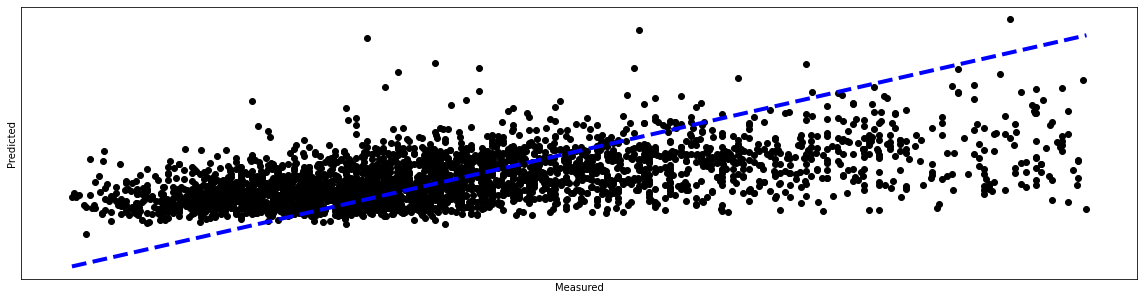

In [23]:

# Plot outputs
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

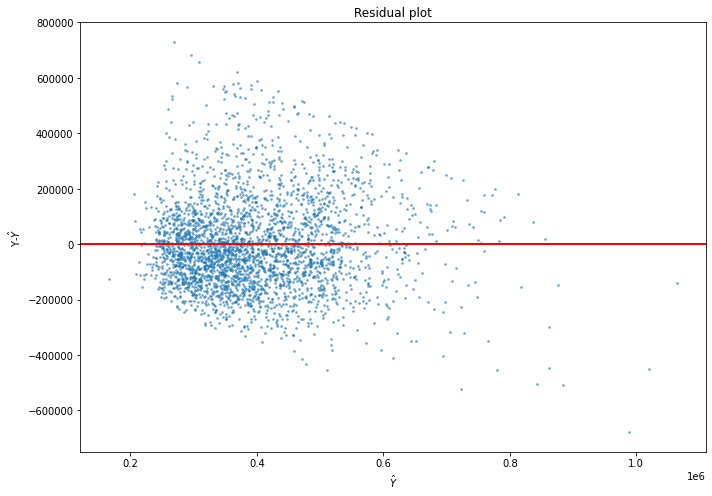

In [24]:
# Residual plot

plt.figure(figsize=(10, 7))

resid = label_test - regr.predict(features_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

### 7. Export

In [25]:
# Download model as pkl file

import joblib
joblib.dump(regr, 'regr.pkl')

['regr.pkl']

# HOMEWORK 1

### 6. Train Test Split

   SOLDPRICE
0   247000.0
1   525000.0
2   479000.0
3   176505.0
4   530000.0
   BEDS  BATHS  SQFT  AGE   LOTSIZE  GARAGE
0    12    4.0  4772  118    8350.0       0
1     3    3.0  2774   28  106286.0       2
2     3    2.5  2000    1   30000.0       2
3     2    1.0     0    0       0.0       0
4     3    2.5  2639   15   18730.0       2
(2571, 6) (1267, 6) (2571, 1) (1267, 1)
Variance score: 0.31
Variance score2: 0.26


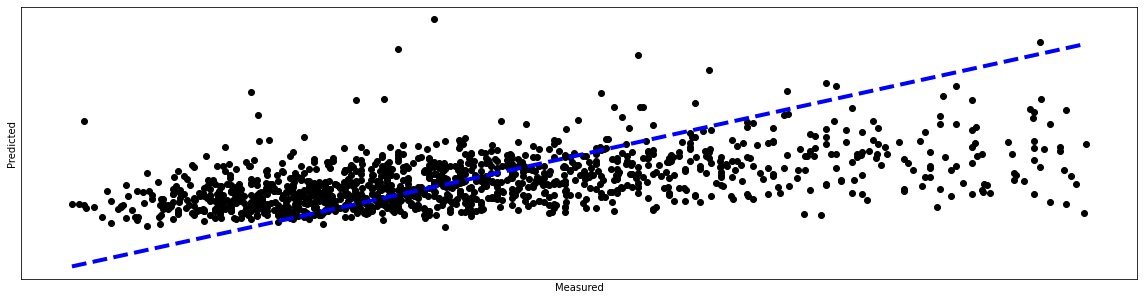

['linear_model.pkl']

In [26]:
# YOUR TURN
# Use sklearn train|test|split
# Ref. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

filter_data = copy_and_filter(data)
label_data = filter_data[label]
features_data = filter_data[features]

# Init x, y test,train @ 33% size (sklearn)
features_train, features_test, label_train, label_test = train_test_split(features_data, label_data, test_size=0.33, random_state=42)

print(features_train.shape, features_test.shape, label_train.shape, label_test.shape)

# Determine linear_model (sklearn - above))
l_regr = linear_model.LinearRegression()

# Train linear_model (sklearn)
l_regr.fit(features_train, label_train)

# Score Method 1: (sklearn)
# Ref. https://stackoverflow.com/questions/45529907/difference-between-model-score-vs-r2-score
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
print('Variance score: %.2f' % l_regr.score(features_train, label_train))

# Score Method 2 (sklearn)
label_pred = l_regr.predict(features_test)
# r2_score(y_true, y_pred, ...)
print('Variance score2: %.2f' % r2_score(label_test, label_pred))

# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

# Download model as pkl file
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle
# save the model to disk
filename = 'linear_model.pkl'
joblib.dump(l_regr, filename)

### 7. Decision Tree

Fit depth:  28
Variance score: -0.15


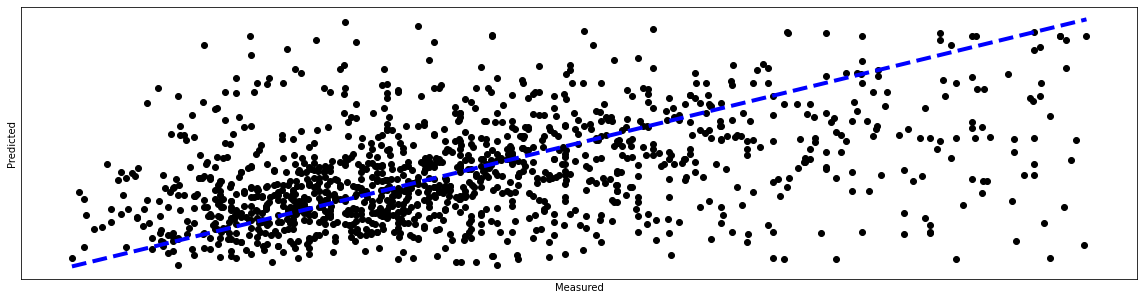

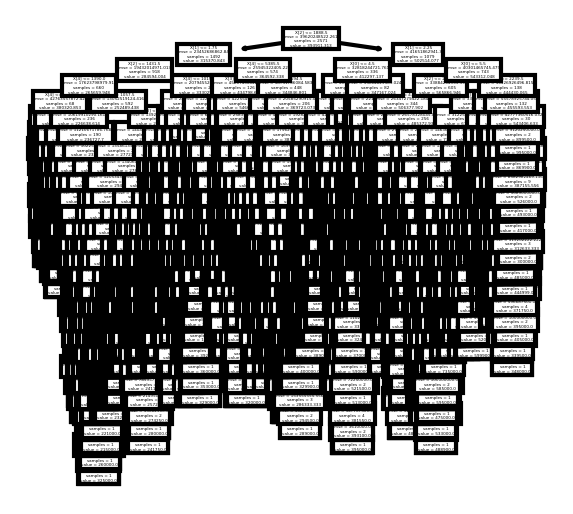

<Figure size 3600x3240 with 0 Axes>

['tree_model.pkl']

In [41]:
# YOUR TURN
# Run DecisionTreeRegressor
# HINT: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']

data = pd.read_csv('./data/Boston_March2018.csv')

def copy_and_filter(data):
    filter_data = data.copy()

    # Additional
    filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]


    # Apply to all
    for f in features + label:
        # Out empties - (v. imputation)
        filter_data = filter_data[filter_data[f].notna()]

        # Interaction terms

        # Standardize
# NOTE: Decision tree regressor doesn't seem to work well - returns decimals if you normalize
#         filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()

#         # v. Normalize
#         filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())

    filter_data = filter_data.reset_index()

    return filter_data

filter_data = copy_and_filter(data)
label_data = filter_data[label]
features_data = filter_data[features]

features_train, features_test, label_train, label_test = train_test_split(features_data, label_data, test_size=0.33, random_state=42)

# Create regressor
regressor = DecisionTreeRegressor(random_state=1)

# Fit
regressor.fit(features_train, label_train)
print('Fit depth: ', regressor.get_depth())

# Predictions
label_pred = regressor.predict(features_test)

# Score
# print('Variance score2: %.2f' % regressor.score(X_train, y_train))
print('Variance score: %.2f' % r2_score(label_test, label_pred))

# Plot outputs (matplotlab - above)
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

# Plot as tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
plot_tree(regressor)
plt.figure(figsize=(50, 45))
plt.show()

# Download model as pkl file
import pickle
# save the model to disk
filename = 'tree_model.pkl'
joblib.dump(regressor, filename)

### Ref
    + https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

In [42]:
# Compare decision vs Linear
linear_model = joblib.load('linear_model.pkl')
tree_model = joblib.load('tree_model.pkl')

beds = [0,1,2,3,4]
baths = [1,2,3,4]
sqfts = [1000, 2000, 3000, 4000]
ages = [0, 5, 10, 15, 20]
lots = [3000, 5000, 8000]
garages = [0,1]

for bed in beds:
    for bath in baths:
        for sqft in sqfts:
            for age in ages:
                for lot in lots:
                    for garage in garages:
                        linear_pred = linear_model.predict([[bed, bath, sqft, age, lot, garage]])[0][0].round(2)
                        tree_pred = tree_model.predict([[bed, bath, sqft, age, lot, garage]])[0].round(6)
                        print([bed, bath, sqft, age, lot, garage], "Linear: ", linear_pred, "Tree: ", tree_pred)

[0, 1, 1000, 0, 3000, 0] Linear:  379992.53 Tree:  105000.0
[0, 1, 1000, 0, 3000, 1] Linear:  389014.89 Tree:  85000.0
[0, 1, 1000, 0, 5000, 0] Linear:  379983.18 Tree:  105000.0
[0, 1, 1000, 0, 5000, 1] Linear:  389005.54 Tree:  85000.0
[0, 1, 1000, 0, 8000, 0] Linear:  379969.15 Tree:  100000.0
[0, 1, 1000, 0, 8000, 1] Linear:  388991.52 Tree:  85000.0
[0, 1, 1000, 5, 3000, 0] Linear:  379404.98 Tree:  105000.0
[0, 1, 1000, 5, 3000, 1] Linear:  388427.34 Tree:  85000.0
[0, 1, 1000, 5, 5000, 0] Linear:  379395.63 Tree:  105000.0
[0, 1, 1000, 5, 5000, 1] Linear:  388418.0 Tree:  85000.0
[0, 1, 1000, 5, 8000, 0] Linear:  379381.61 Tree:  100000.0
[0, 1, 1000, 5, 8000, 1] Linear:  388403.97 Tree:  85000.0
[0, 1, 1000, 10, 3000, 0] Linear:  378817.43 Tree:  105000.0
[0, 1, 1000, 10, 3000, 1] Linear:  387839.8 Tree:  85000.0
[0, 1, 1000, 10, 5000, 0] Linear:  378808.08 Tree:  105000.0
[0, 1, 1000, 10, 5000, 1] Linear:  387830.45 Tree:  85000.0
[0, 1, 1000, 10, 8000, 0] Linear:  378794.06 T

[0, 2, 4000, 15, 8000, 1] Linear:  778467.35 Tree:  735644.0
[0, 2, 4000, 20, 3000, 0] Linear:  768880.81 Tree:  735644.0
[0, 2, 4000, 20, 3000, 1] Linear:  777903.17 Tree:  735644.0
[0, 2, 4000, 20, 5000, 0] Linear:  768871.46 Tree:  735644.0
[0, 2, 4000, 20, 5000, 1] Linear:  777893.82 Tree:  735644.0
[0, 2, 4000, 20, 8000, 0] Linear:  768857.43 Tree:  735644.0
[0, 2, 4000, 20, 8000, 1] Linear:  777879.8 Tree:  735644.0
[0, 3, 1000, 0, 3000, 0] Linear:  478454.26 Tree:  885000.0
[0, 3, 1000, 0, 3000, 1] Linear:  487476.63 Tree:  885000.0
[0, 3, 1000, 0, 5000, 0] Linear:  478444.91 Tree:  885000.0
[0, 3, 1000, 0, 5000, 1] Linear:  487467.28 Tree:  885000.0
[0, 3, 1000, 0, 8000, 0] Linear:  478430.89 Tree:  255000.0
[0, 3, 1000, 0, 8000, 1] Linear:  487453.26 Tree:  255000.0
[0, 3, 1000, 5, 3000, 0] Linear:  477866.72 Tree:  210000.0
[0, 3, 1000, 5, 3000, 1] Linear:  486889.08 Tree:  210000.0
[0, 3, 1000, 5, 5000, 0] Linear:  477857.37 Tree:  210000.0
[0, 3, 1000, 5, 5000, 1] Linear:  

[1, 1, 3000, 0, 8000, 1] Linear:  577051.73 Tree:  319900.0
[1, 1, 3000, 5, 3000, 0] Linear:  567465.19 Tree:  309900.0
[1, 1, 3000, 5, 3000, 1] Linear:  576487.56 Tree:  319900.0
[1, 1, 3000, 5, 5000, 0] Linear:  567455.84 Tree:  309900.0
[1, 1, 3000, 5, 5000, 1] Linear:  576478.21 Tree:  319900.0
[1, 1, 3000, 5, 8000, 0] Linear:  567441.82 Tree:  309900.0
[1, 1, 3000, 5, 8000, 1] Linear:  576464.18 Tree:  319900.0
[1, 1, 3000, 10, 3000, 0] Linear:  566877.64 Tree:  309900.0
[1, 1, 3000, 10, 3000, 1] Linear:  575900.01 Tree:  319900.0
[1, 1, 3000, 10, 5000, 0] Linear:  566868.29 Tree:  309900.0
[1, 1, 3000, 10, 5000, 1] Linear:  575890.66 Tree:  319900.0
[1, 1, 3000, 10, 8000, 0] Linear:  566854.27 Tree:  309900.0
[1, 1, 3000, 10, 8000, 1] Linear:  575876.64 Tree:  319900.0
[1, 1, 3000, 15, 3000, 0] Linear:  566290.09 Tree:  309900.0
[1, 1, 3000, 15, 3000, 1] Linear:  575312.46 Tree:  319900.0
[1, 1, 3000, 15, 5000, 0] Linear:  566280.74 Tree:  309900.0
[1, 1, 3000, 15, 5000, 1] Linea

[1, 4, 2000, 0, 8000, 0] Linear:  601719.44 Tree:  825000.0
[1, 4, 2000, 0, 8000, 1] Linear:  610741.8 Tree:  975000.0
[1, 4, 2000, 5, 3000, 0] Linear:  601155.26 Tree:  415000.0
[1, 4, 2000, 5, 3000, 1] Linear:  610177.63 Tree:  362500.0
[1, 4, 2000, 5, 5000, 0] Linear:  601145.91 Tree:  715000.0
[1, 4, 2000, 5, 5000, 1] Linear:  610168.28 Tree:  715000.0
[1, 4, 2000, 5, 8000, 0] Linear:  601131.89 Tree:  365000.0
[1, 4, 2000, 5, 8000, 1] Linear:  610154.25 Tree:  370000.0
[1, 4, 2000, 10, 3000, 0] Linear:  600567.71 Tree:  415000.0
[1, 4, 2000, 10, 3000, 1] Linear:  609590.08 Tree:  362500.0
[1, 4, 2000, 10, 5000, 0] Linear:  600558.36 Tree:  715000.0
[1, 4, 2000, 10, 5000, 1] Linear:  609580.73 Tree:  715000.0
[1, 4, 2000, 10, 8000, 0] Linear:  600544.34 Tree:  365000.0
[1, 4, 2000, 10, 8000, 1] Linear:  609566.71 Tree:  370000.0
[1, 4, 2000, 15, 3000, 0] Linear:  599980.17 Tree:  415000.0
[1, 4, 2000, 15, 3000, 1] Linear:  609002.53 Tree:  362500.0
[1, 4, 2000, 15, 5000, 0] Linear:

[2, 2, 4000, 15, 5000, 0] Linear:  689569.29 Tree:  735644.0
[2, 2, 4000, 15, 5000, 1] Linear:  698591.66 Tree:  735644.0
[2, 2, 4000, 15, 8000, 0] Linear:  689555.27 Tree:  735644.0
[2, 2, 4000, 15, 8000, 1] Linear:  698577.63 Tree:  735644.0
[2, 2, 4000, 20, 3000, 0] Linear:  688991.09 Tree:  735644.0
[2, 2, 4000, 20, 3000, 1] Linear:  698013.46 Tree:  735644.0
[2, 2, 4000, 20, 5000, 0] Linear:  688981.74 Tree:  735644.0
[2, 2, 4000, 20, 5000, 1] Linear:  698004.11 Tree:  735644.0
[2, 2, 4000, 20, 8000, 0] Linear:  688967.72 Tree:  735644.0
[2, 2, 4000, 20, 8000, 1] Linear:  697990.09 Tree:  735644.0
[2, 3, 1000, 0, 3000, 0] Linear:  398564.55 Tree:  885000.0
[2, 3, 1000, 0, 3000, 1] Linear:  407586.92 Tree:  885000.0
[2, 3, 1000, 0, 5000, 0] Linear:  398555.2 Tree:  885000.0
[2, 3, 1000, 0, 5000, 1] Linear:  407577.57 Tree:  885000.0
[2, 3, 1000, 0, 8000, 0] Linear:  398541.18 Tree:  255000.0
[2, 3, 1000, 0, 8000, 1] Linear:  407563.54 Tree:  255000.0
[2, 3, 1000, 5, 3000, 0] Linear

[3, 1, 4000, 15, 5000, 1] Linear:  609415.93 Tree:  735644.0
[3, 1, 4000, 15, 8000, 0] Linear:  600379.54 Tree:  735644.0
[3, 1, 4000, 15, 8000, 1] Linear:  609401.91 Tree:  735644.0
[3, 1, 4000, 20, 3000, 0] Linear:  599815.37 Tree:  735644.0
[3, 1, 4000, 20, 3000, 1] Linear:  608837.73 Tree:  735644.0
[3, 1, 4000, 20, 5000, 0] Linear:  599806.02 Tree:  735644.0
[3, 1, 4000, 20, 5000, 1] Linear:  608828.38 Tree:  735644.0
[3, 1, 4000, 20, 8000, 0] Linear:  599791.99 Tree:  735644.0
[3, 1, 4000, 20, 8000, 1] Linear:  608814.36 Tree:  735644.0
[3, 2, 1000, 0, 3000, 0] Linear:  309388.82 Tree:  885000.0
[3, 2, 1000, 0, 3000, 1] Linear:  318411.19 Tree:  885000.0
[3, 2, 1000, 0, 5000, 0] Linear:  309379.48 Tree:  885000.0
[3, 2, 1000, 0, 5000, 1] Linear:  318401.84 Tree:  885000.0
[3, 2, 1000, 0, 8000, 0] Linear:  309365.45 Tree:  256000.0
[3, 2, 1000, 0, 8000, 1] Linear:  318387.82 Tree:  256000.0
[3, 2, 1000, 5, 3000, 0] Linear:  308801.28 Tree:  210000.0
[3, 2, 1000, 5, 3000, 1] Linear

[4, 1, 1000, 20, 8000, 1] Linear:  226861.9 Tree:  85000.0
[4, 1, 2000, 0, 3000, 0] Linear:  334215.63 Tree:  769000.0
[4, 1, 2000, 0, 3000, 1] Linear:  343238.0 Tree:  629108.0
[4, 1, 2000, 0, 5000, 0] Linear:  334206.28 Tree:  769000.0
[4, 1, 2000, 0, 5000, 1] Linear:  343228.65 Tree:  629108.0
[4, 1, 2000, 0, 8000, 0] Linear:  334192.26 Tree:  769000.0
[4, 1, 2000, 0, 8000, 1] Linear:  343214.63 Tree:  600041.0
[4, 1, 2000, 5, 3000, 0] Linear:  333628.08 Tree:  769000.0
[4, 1, 2000, 5, 3000, 1] Linear:  342650.45 Tree:  629108.0
[4, 1, 2000, 5, 5000, 0] Linear:  333618.74 Tree:  769000.0
[4, 1, 2000, 5, 5000, 1] Linear:  342641.1 Tree:  629108.0
[4, 1, 2000, 5, 8000, 0] Linear:  333604.71 Tree:  769000.0
[4, 1, 2000, 5, 8000, 1] Linear:  342627.08 Tree:  600041.0
[4, 1, 2000, 10, 3000, 0] Linear:  333040.54 Tree:  769000.0
[4, 1, 2000, 10, 3000, 1] Linear:  342062.9 Tree:  330000.0
[4, 1, 2000, 10, 5000, 0] Linear:  333031.19 Tree:  769000.0
[4, 1, 2000, 10, 5000, 1] Linear:  342053

[4, 4, 4000, 10, 3000, 0] Linear:  708738.21 Tree:  390000.0
[4, 4, 4000, 10, 3000, 1] Linear:  717760.58 Tree:  390000.0
[4, 4, 4000, 10, 5000, 0] Linear:  708728.86 Tree:  390000.0
[4, 4, 4000, 10, 5000, 1] Linear:  717751.23 Tree:  390000.0
[4, 4, 4000, 10, 8000, 0] Linear:  708714.84 Tree:  390000.0
[4, 4, 4000, 10, 8000, 1] Linear:  717737.2 Tree:  390000.0
[4, 4, 4000, 15, 3000, 0] Linear:  708150.66 Tree:  920000.0
[4, 4, 4000, 15, 3000, 1] Linear:  717173.03 Tree:  920000.0
[4, 4, 4000, 15, 5000, 0] Linear:  708141.31 Tree:  920000.0
[4, 4, 4000, 15, 5000, 1] Linear:  717163.68 Tree:  920000.0
[4, 4, 4000, 15, 8000, 0] Linear:  708127.29 Tree:  689250.0
[4, 4, 4000, 15, 8000, 1] Linear:  717149.66 Tree:  689250.0
[4, 4, 4000, 20, 3000, 0] Linear:  707563.12 Tree:  920000.0
[4, 4, 4000, 20, 3000, 1] Linear:  716585.48 Tree:  920000.0
[4, 4, 4000, 20, 5000, 0] Linear:  707553.77 Tree:  920000.0
[4, 4, 4000, 20, 5000, 1] Linear:  716576.13 Tree:  920000.0
[4, 4, 4000, 20, 8000, 0]